In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk 


## Importing the dataset

In [ ]:

airlineDataset = pd.read_csv("https://raw.githubusercontent.com/pawankholiya01/DWDW-Project/master/Tweets.csv")
print(airlineDataset.head())

             tweet_id  ...               user_timezone
0  570306133677760513  ...  Eastern Time (US & Canada)
1  570301130888122368  ...  Pacific Time (US & Canada)
2  570301083672813571  ...  Central Time (US & Canada)
3  570301031407624196  ...  Pacific Time (US & Canada)
4  570300817074462722  ...  Pacific Time (US & Canada)

[5 rows x 15 columns]


### Checking for duplicate rows in our dataset


In [ ]:
# Finding Number of Duplicate Rows in the dataset
dupRows = airlineDataset[airlineDataset.duplicated()] 
print("Duplicate Rows : ",dupRows.shape[0])

Duplicate Rows :  36


### Dropping the duplicate rows

In [ ]:
# Clearing Duplicate Rows from dataset
print("Rows in Orignal Dataset : ",airlineDataset.shape[0])
airlineTweets = airlineDataset.drop_duplicates()
airlineTweets.shape
print("\nRows After Removing Duplicates : ",airlineTweets.shape[0])


Rows in Orignal Dataset :  14640

Rows After Removing Duplicates :  14604


In [5]:
airlineTweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14604 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14604 non-null  int64  
 1   airline_sentiment             14604 non-null  object 
 2   airline_sentiment_confidence  14604 non-null  float64
 3   negativereason                9159 non-null   object 
 4   negativereason_confidence     10503 non-null  float64
 5   airline                       14604 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14604 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14604 non-null  int64  
 10  text                          14604 non-null  object 
 11  tweet_coord                   1015 non-null   object 
 12  tweet_created                 14604 non-null  object 
 13  t

In [6]:
airlineTweets=airlineTweets[['airline','text','airline_sentiment',]]
airlineTweets.head()

,airline,text,airline_sentiment
0,Virgin America,@VirginAmerica What @dhepburn said.,neutral
1,Virgin America,@VirginAmerica plus you've added commercials t...,positive
2,Virgin America,@VirginAmerica I didn't today... Must mean I n...,neutral
3,Virgin America,@VirginAmerica it's really aggressive to blast...,negative
4,Virgin America,@VirginAmerica and it's a really big bad thing...,negative


## Cleaning the Tweets

Selecting the required attributes from the dataframe

In [7]:
# Cleaning the Tweet Text 
tweets = airlineTweets.iloc[:,1].values
cleanedTweets = []

for text in tweets:
    
    # Removing special chars
    cleanedTweet = re.sub(r'\W', ' ', str(text))

    # Removing Single characters
    cleanedTweet= re.sub(r'\s+[a-zA-Z]\s+', ' ', cleanedTweet)
    cleanedTweet = re.sub(r'\^[a-zA-Z]\s+', ' ', cleanedTweet) 

    # Replacing Multiple Spaces
    cleanedTweet = re.sub(r'\s+', ' ', cleanedTweet, flags=re.I)
    cleanedTweet = re.sub(r'^b\s+', '', cleanedTweet)

    # Converting to Lowercase
    cleanedTweet = cleanedTweet.lower()

    cleanedTweets.append(cleanedTweet)

In [8]:
# Replacing with cleaned tweets in the data frame
airlineTweets = airlineTweets[['airline','airline_sentiment']]
airlineTweets['text'] = cleanedTweets
airlineTweets = airlineTweets[['airline','text','airline_sentiment']]
airlineTweets.head()


,airline,text,airline_sentiment
0,Virgin America,virginamerica what dhepburn said,neutral
1,Virgin America,virginamerica plus you ve added commercials t...,positive
2,Virgin America,virginamerica didn today must mean need to ta...,neutral
3,Virgin America,virginamerica it really aggressive to blast o...,negative
4,Virgin America,virginamerica and it a really big bad thing a...,negative


## Exploratory Data Analysis

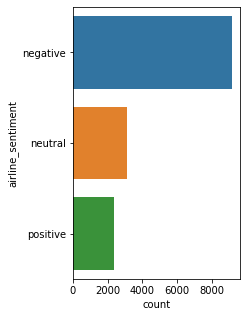

In [9]:
plt.figure(figsize=(3,5))
sns.countplot(y = airlineTweets['airline_sentiment'], order = airlineTweets.airline_sentiment.value_counts().index,palette= 'tab10')
plt.show()

### Tweet count wrt each Airline

Text(0.5, 1.0, 'Count of tweets for each airline')

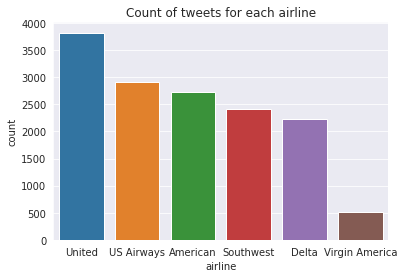

In [10]:
sns.set_style('darkgrid')
sns.countplot(data=airlineTweets, x=airlineTweets['airline'],order = airlineTweets['airline'].value_counts().index).set_title('Count of tweets for each airline')

### Sentiment distribution of tweets for each Airline

Text(0.5, 1.0, 'Sentiment distribution of tweets')

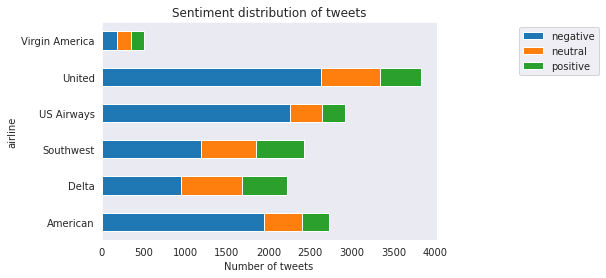

In [11]:
sns.set_style('dark')

types = airlineTweets.groupby("airline")['airline_sentiment'].value_counts(normalize=False).sort_index()
types.unstack().plot(kind='barh', stacked='True')
plt.legend(bbox_to_anchor=(1.5, 1), loc='upper right')
plt.xlabel("Number of tweets")
plt.title("Sentiment distribution of tweets")

## Feature Extraction 

### 1. Bag of Words method

In [12]:

from sklearn.feature_extraction.text import CountVectorizer

# Building Bag of Words Feature Matrix
wordCount = CountVectorizer(cleanedTweets,max_features = 5000)
wordCount.fit(list(airlineTweets.iloc[:,1].values))
bowArray = wordCount.transform(list(airlineTweets.iloc[:,1].values))
BoWfeatures = bowArray.toarray()

print("Feature Matrix is : ")
print(BoWfeatures)


Feature Matrix is : 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [13]:

BoWmat = pd.DataFrame(BoWfeatures,index =cleanedTweets,columns=wordCount.get_feature_names() )
BoWmat.head(2)

,00,000,0016,00pm,02,03,05,05am,05pm,08,10,100,1000,1007,1027,1051,1081,10a,10am,10hrs,10pm,11,118,11am,11th,12,120,1200,1230,125,13,130,1359,136,13th,14,140,1472,15,150,...,wtf,wth,xna,xx,ya,yall,yay,yea,yeah,year,years,yell,yelled,yelling,yep,yes,yest,yesterday,yet,yo,york,you,young,your,youre,yours,yourself,yourselves,yousuck,youth,yr,yrs,yuma,yup,yvr,yyz,zero,zkatcher,zone,zurich
virginamerica what dhepburn said,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
virginamerica plus you ve added commercials to the experience tacky,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 2. TF-IDF

In [14]:

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

TFvectorizer = TfidfVectorizer (cleanedTweets,max_features=5000)
TFfeatures = TFvectorizer.fit_transform(cleanedTweets).toarray()
print("TF-IDF Feature Matrix is : ")
print(TFfeatures)

TF-IDF Feature Matrix is : 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [15]:

TFmat = pd.DataFrame(TFfeatures,index =cleanedTweets,columns=TFvectorizer.get_feature_names() )
TFmat.head(2)

,00,000,0016,00pm,02,03,05,05am,05pm,08,10,100,1000,1007,1027,1051,1081,10a,10am,10hrs,10pm,11,118,11am,11th,12,120,1200,1230,125,13,130,1359,136,13th,14,140,1472,15,150,...,wtf,wth,xna,xx,ya,yall,yay,yea,yeah,year,years,yell,yelled,yelling,yep,yes,yest,yesterday,yet,yo,york,you,young,your,youre,yours,yourself,yourselves,yousuck,youth,yr,yrs,yuma,yup,yvr,yyz,zero,zkatcher,zone,zurich
virginamerica what dhepburn said,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
virginamerica plus you ve added commercials to the experience tacky,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.148927,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Training  the Models


For BoW


In [16]:

from sklearn.model_selection import train_test_split

BoWX_train, BoWX_test, BoWY_train, BoWY_test = train_test_split(BoWfeatures, 
airlineTweets.iloc[:,2].values, test_size=0.3, random_state=5)


For TF-IDF

In [17]:

from sklearn.model_selection import train_test_split

TFX_train, TFX_test, TFY_train, TFY_test = train_test_split(TFfeatures,
airlineTweets.iloc[:,2].values,test_size=0.3, random_state=5)


In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


## Information Gain

In [19]:
from sklearn import tree

# criteria as entropy for information gain based classifier
IGclassifier = tree.DecisionTreeClassifier(criterion='entropy',max_depth=5)
IGclassifier

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### BOW

In [20]:
# Training the model
IGclassifier.fit(BoWX_train, BoWY_train)

# Predicting values for test set for  
# Bag of Words Feature Set
IGBoWpred = IGclassifier.predict(BoWX_test)

# Confusion Matrix
print("Confusion Matrix : \n",confusion_matrix(BoWY_test,IGBoWpred))
print(classification_report(BoWY_test,IGBoWpred))

print("\nAccuracy of IG Classifier with BoW Features : ",
                    IGclassifier.score(BoWX_test, BoWY_test))

Confusion Matrix : 
 [[2574   76  119]
 [ 706  135   65]
 [ 346   42  319]]
              precision    recall  f1-score   support

    negative       0.71      0.93      0.81      2769
     neutral       0.53      0.15      0.23       906
    positive       0.63      0.45      0.53       707

    accuracy                           0.69      4382
   macro avg       0.63      0.51      0.52      4382
weighted avg       0.66      0.69      0.64      4382


Accuracy of IG Classifier with BoW Features :  0.6910086718393428


### TF-IDF

In [ ]:
# Training the model
IGclassifier.fit(TFX_train, TFY_train)

# Predicting values for test set for  
# IF-IDF Feature Set
IGTFpred = IGclassifier.predict(TFX_test)

# Confusion Matrix
print("Confusion Matrix : \n",confusion_matrix(TFY_test,IGTFpred))
print(classification_report(TFY_test,IGTFpred))

print("\nAccuracy of IG Classifier with TF-IDF Features : ",
                    IGclassifier.score(TFX_test, TFY_test))

## Ginni Index

In [ ]:
from sklearn import tree

# criteria as gini for Gini Index based classifier
GINNIclassifier = tree.DecisionTreeClassifier(criterion='gini',max_depth=5)
GINNIclassifier

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### BoW

In [ ]:
# Training the model
GINNIclassifier.fit(BoWX_train, BoWY_train)

# Predicting values for test set for  
# Bag of Words Feature Set
GINNIBoWpred = GINNIclassifier.predict(BoWX_test)

# Confusion Matrix
print("Confusion Matrix : \n",confusion_matrix(BoWY_test,GINNIBoWpred))
print(classification_report(BoWY_test,GINNIBoWpred))

print("\nAccuracy of GINNI Classifier with BoW Features : ",
                    GINNIclassifier.score(BoWX_test, BoWY_test))

Confusion Matrix : 
 [[2645   26   98]
 [ 756   86   64]
 [ 393   17  297]]
              precision    recall  f1-score   support

    negative       0.70      0.96      0.81      2769
     neutral       0.67      0.09      0.17       906
    positive       0.65      0.42      0.51       707

    accuracy                           0.69      4382
   macro avg       0.67      0.49      0.49      4382
weighted avg       0.68      0.69      0.63      4382


Accuracy of GINNI Classifier with BoW Features :  0.6910086718393428


#### TF-IDF

In [ ]:
# Training the model
GINNIclassifier.fit(TFX_train, TFY_train)

# Predicting values for test set for  
# TF-IDF Feature Set
GINNITFpred = GINNIclassifier.predict(TFX_test)

# Confusion Matrix
print("Confusion Matrix : \n",confusion_matrix(TFY_test,GINNITFpred))
print(classification_report(TFY_test,GINNITFpred))

print("\nAccuracy of GINNI Classifier with TF-IDF Features : ",
                    GINNIclassifier.score(TFX_test, TFY_test))


Confusion Matrix : 
 [[2527  165   77]
 [ 619  237   50]
 [ 330  101  276]]
              precision    recall  f1-score   support

    negative       0.73      0.91      0.81      2769
     neutral       0.47      0.26      0.34       906
    positive       0.68      0.39      0.50       707

    accuracy                           0.69      4382
   macro avg       0.63      0.52      0.55      4382
weighted avg       0.67      0.69      0.66      4382


Accuracy of GINNI Classifier with TF-IDF Features :  0.6937471474212689


## Naive Bayes Classifier


In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
NBclassifier = GaussianNB()
NBclassifier

GaussianNB(priors=None, var_smoothing=1e-09)


#### BoW

In [ ]:
# Training the model
NBclassifier.fit(BoWX_train, BoWY_train)

# Predicting values for test set for  
# Bag of Words Feature Set
NBBoWpred = NBclassifier.predict(BoWX_test)

# Confusion Matrix
print("Confusion Matrix : \n",confusion_matrix(BoWY_test,NBBoWpred))
print(classification_report(BoWY_test,NBBoWpred))

print("\nAccuracy of Naive Bayes Classifier with BoW Features : ",
                    NBclassifier.score(BoWX_test, BoWY_test))

Confusion Matrix : 
 [[1456  577  736]
 [ 168  305  433]
 [ 135   99  473]]
              precision    recall  f1-score   support

    negative       0.83      0.53      0.64      2769
     neutral       0.31      0.34      0.32       906
    positive       0.29      0.67      0.40       707

    accuracy                           0.51      4382
   macro avg       0.48      0.51      0.46      4382
weighted avg       0.63      0.51      0.54      4382


Accuracy of Naive Bayes Classifier with BoW Features :  0.5098128708352351


#### TF-IDF

In [ ]:
# Training the model
NBclassifier.fit(TFX_train, TFY_train)

# Predicting values for test set for  
# TF-IDF Feature Set
NBTFpred = NBclassifier.predict(TFX_test)

# Confusion Matrix
print("Confusion Matrix : \n",confusion_matrix(TFY_test,NBTFpred))
print(classification_report(TFY_test,NBTFpred))

print("\nAccuracy of Naive Bayes with TF-IDF Features : ",
                    NBclassifier.score(TFX_test, TFY_test))


Confusion Matrix : 
 [[1468  575  726]
 [ 183  299  424]
 [ 145  104  458]]
              precision    recall  f1-score   support

    negative       0.82      0.53      0.64      2769
     neutral       0.31      0.33      0.32       906
    positive       0.28      0.65      0.40       707

    accuracy                           0.51      4382
   macro avg       0.47      0.50      0.45      4382
weighted avg       0.63      0.51      0.54      4382


Accuracy of Naive Bayes with TF-IDF Features :  0.5077590141487905


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Create a 7-Nearest Neighbour Classifier
KNNclassifier = KNeighborsClassifier(n_neighbors= 7)
KNNclassifier

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

#### BoG

In [ ]:
#Training the model
KNNclassifier.fit(BoWX_train[:2000], BoWY_train[:2000])

#Predicting values for test set for  
#Bag of Words Feature Set
KNNBoWpred = KNNclassifier.predict(BoWX_test[:500])

#Confusion Matrix
print("Confusion Matrix : \n",confusion_matrix(BoWY_test[:500],KNNBoWpred))
print(classification_report(BoWY_test[:500],KNNBoWpred))

print("\nAccuracy of KNN Classifier with BoW Features : ",
                     KNNclassifier.score(BoWX_test[:500], BoWY_test[:500]))

Confusion Matrix : 
 [[114 118 100]
 [  9  55  22]
 [  5  34  43]]
              precision    recall  f1-score   support

    negative       0.89      0.34      0.50       332
     neutral       0.27      0.64      0.38        86
    positive       0.26      0.52      0.35        82

    accuracy                           0.42       500
   macro avg       0.47      0.50      0.41       500
weighted avg       0.68      0.42      0.45       500


Accuracy of KNN Classifier with BoW Features :  0.424


#### TF_IDF

In [ ]:
# Training the 
KNNclassifier.fit(TFX_train[:2000], TFY_train[:2000])

# Predicting values for test set for  
# TF-IDF Feature Set
KNNTFpred = KNNclassifier.predict(TFX_test[:500])

# Confusion Matrix
print("Confusion Matrix : \n",confusion_matrix(TFY_test[:500],KNNTFpred))
print(classification_report(TFY_test[:500],KNNTFpred))
print("\nAccuracy of KNN with TF-IDF Features : ",
                    KNNclassifier.score(TFX_test[:500], TFY_test[:500]))


Confusion Matrix : 
 [[300  17  15]
 [ 51  29   6]
 [ 32  15  35]]
              precision    recall  f1-score   support

    negative       0.78      0.90      0.84       332
     neutral       0.48      0.34      0.39        86
    positive       0.62      0.43      0.51        82

    accuracy                           0.73       500
   macro avg       0.63      0.56      0.58       500
weighted avg       0.70      0.73      0.71       500


Accuracy of KNN with TF-IDF Features :  0.728


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RFclassifier = RandomForestClassifier(n_estimators=50, random_state=0)
RFclassifier


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


#### BoW

In [ ]:
# Training the model
RFclassifier.fit(BoWX_train, BoWY_train)

# Predicting values for test set for  
# Bag of Words Feature Set
RFBoWpred = RFclassifier.predict(BoWX_test)

# Confusion Matrix
print("Confusion Matrix : \n",confusion_matrix(BoWY_test,RFBoWpred))
print(classification_report(BoWY_test,RFBoWpred))

print("\nAccuracy of Random FOrest Classifier with BoW Features : ",
                    RFclassifier.score(BoWX_test, BoWY_test))

Confusion Matrix : 
 [[2645   96   28]
 [ 508  345   53]
 [ 270   84  353]]
              precision    recall  f1-score   support

    negative       0.77      0.96      0.85      2769
     neutral       0.66      0.38      0.48       906
    positive       0.81      0.50      0.62       707

    accuracy                           0.76      4382
   macro avg       0.75      0.61      0.65      4382
weighted avg       0.76      0.76      0.74      4382


Accuracy of Random FOrest Classifier with BoW Features :  0.7628936558649019


#### TF-IDF

In [ ]:
# Training the model
RFclassifier.fit(TFX_train, TFY_train)

# Predicting values for test set for  
# TF-IDF Feature Set
RFTFpred = RFclassifier.predict(TFX_test)

# Confusion Matrix
print("Confusion Matrix : \n",confusion_matrix(TFY_test,RFTFpred))
print(classification_report(TFY_test,RFTFpred))

print("\nAccuracy of Random Forest with TF-IDF Features : ",
                    RFclassifier.score(TFX_test, TFY_test))


Confusion Matrix : 
 [[2680   72   17]
 [ 533  326   47]
 [ 310   88  309]]
              precision    recall  f1-score   support

    negative       0.76      0.97      0.85      2769
     neutral       0.67      0.36      0.47       906
    positive       0.83      0.44      0.57       707

    accuracy                           0.76      4382
   macro avg       0.75      0.59      0.63      4382
weighted avg       0.75      0.76      0.73      4382


Accuracy of Random Forest with TF-IDF Features :  0.7565038795070744


## Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBclassifier = GradientBoostingClassifier(n_estimators=50, learning_rate=0.5, 
    max_features=400, max_depth=5,random_state =0)
GBclassifier

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=5,
                           max_features=400, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

#### BoW


In [ ]:
# Training the model
GBclassifier.fit(BoWX_train, BoWY_train)

# Predicting values for test set for  
# Bag of Words Feature Set
GBBoWpred = GBclassifier.predict(BoWX_test)

# Confusion Matrix
print("Confusion Matrix : \n",confusion_matrix(BoWY_test,GBBoWpred))
print(classification_report(BoWY_test,GBBoWpred))

print("\nAccuracy of Gradient Boost Classifier with BoW Features : ",
                    GBclassifier.score(BoWX_test, BoWY_test))

Confusion Matrix : 
 [[2540  153   76]
 [ 426  413   67]
 [ 180   93  434]]
              precision    recall  f1-score   support

    negative       0.81      0.92      0.86      2769
     neutral       0.63      0.46      0.53       906
    positive       0.75      0.61      0.68       707

    accuracy                           0.77      4382
   macro avg       0.73      0.66      0.69      4382
weighted avg       0.76      0.77      0.76      4382


Accuracy of Gradient Boost Classifier with BoW Features :  0.7729347329986308


#### TF-IDF

In [ ]:
# Training the model
GBclassifier.fit(TFX_train, TFY_train)

# Predicting values for test set for  
# TF-IDF Feature Set
GBTFpred = GBclassifier.predict(TFX_test)

# Confusion Matrix
print("Confusion Matrix : \n",confusion_matrix(TFY_test,GBTFpred))
print(classification_report(TFY_test,GBTFpred))

print("\nAccuracy of Gradient Boost with TF-IDF Features : ",
                    GBclassifier.score(TFX_test, TFY_test))


Confusion Matrix : 
 [[2556  147   66]
 [ 458  371   77]
 [ 202   97  408]]
              precision    recall  f1-score   support

    negative       0.79      0.92      0.85      2769
     neutral       0.60      0.41      0.49       906
    positive       0.74      0.58      0.65       707

    accuracy                           0.76      4382
   macro avg       0.71      0.64      0.66      4382
weighted avg       0.75      0.76      0.75      4382


Accuracy of Gradient Boost with TF-IDF Features :  0.7610680054769512


## Analysing Params of Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

acc = []
for i in range(5,50):
    multmod = RandomForestClassifier(n_estimators=i)

    # fitting data onto classifier
    multmod.fit(BoWX_train[:3000], BoWY_train[:3000])

    temp = multmod.score(BoWX_test[:1000], BoWY_test[:1000])
    acc.append(temp)

ran = list(range(5,50))


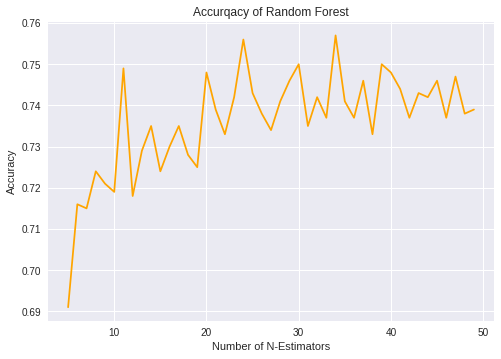

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# Plotting accuracy vs N
plt.plot(ran,acc,color='orange')
plt.xlabel("Number of N-Estimators")
plt.ylabel("Accuracy")
plt.title("Accurqacy of Random Forest")

plt.show()

## Result Analysis 

In [ ]:
accuracy = [69.1,69.1,50.9,42.4,76.3,77.9,69.3,69.3,50.7,72.8,75.7,76.3]
method = ['BoW','BoW','BoW','BoW','BoW','BoW','TF-IDF','TF-IDF','TF-IDF','TF-IDF','TF-IDF','TF-IDF' ]
model = ['IG','Ginni','Naive','KNN','Random Forest','GB','IG','Ginni','Naive','KNN','Random Forest','GB']



In [ ]:
bowacc = [69.1,69.1,50.9,42.4,76.3,77.9]
tfacc = [69.3,69.3,50.7,72.8,75.7,76.3]
print(np.mean(bowacc))
print(np.mean(tfacc))

64.28333333333335
69.01666666666667


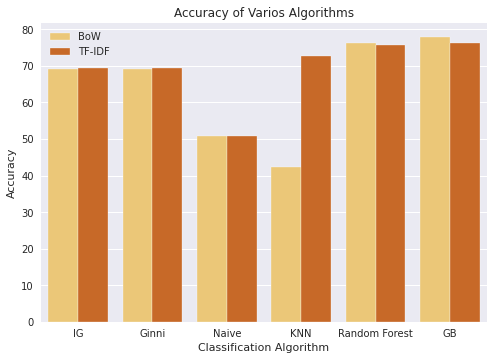

In [ ]:
sns.set_style('darkgrid')
# plt.style.use('dar')
sns.lineplot(x = model,y = accuracy,hue=method,marker='o')
sns.barplot(x = model,y = accuracy,hue=method,palette = 'YlOrBr')

plt.xlabel("Classification Algorithm")
plt.ylabel("Accuracy")
plt.title("Accuracy of Varios Algorithms")
plt.show()

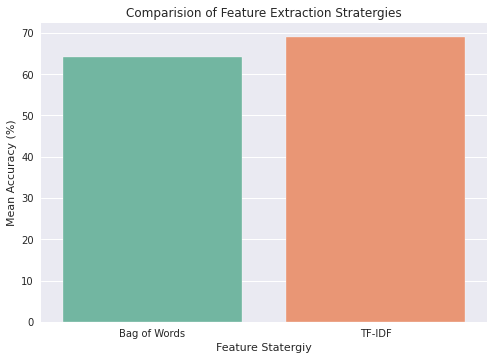

In [ ]:
sns.set_style('darkgrid')
# plt.style.use('dar')
# sns.lineplot(x = model,y = accuracy,hue=method,marker='o')
sns.barplot(y = [64.28,69.01],x = ['Bag of Words','TF-IDF'],palette = 'Set2')

plt.xlabel("Feature Statergiy")
plt.ylabel("Mean Accuracy (%)")
plt.title("Comparision of Feature Extraction Stratergies")
plt.show()